In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

life_df = pd.read_csv("life_expectancy_data.csv")

In [9]:
life_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,GDP,Life expectancy class
0,Afghanistan,2015,Developing,65.0,263.0,62,584.259210,Low
1,Albania,2015,Developing,77.8,74.0,0,3954.227830,High
2,Algeria,2015,Developing,75.6,19.0,21,4132.762920,Medium
3,Angola,2015,Developing,52.4,335.0,66,3695.793748,Low
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,13566.954100,High
...,...,...,...,...,...,...,...,...
178,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,4110.000000,Medium
179,Viet Nam,2015,Developing,76.0,127.0,28,2600.000000,High
180,Yemen,2015,Developing,65.7,224.0,37,1490.000000,Low
181,Zambia,2015,Developing,61.8,33.0,27,1313.889646,Low


<Axes: xlabel='Life expectancy', ylabel='Count'>

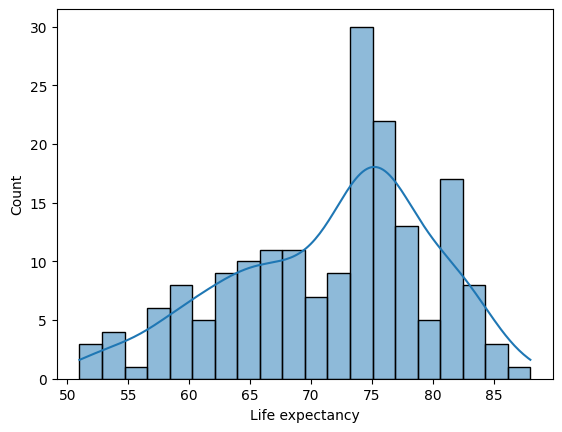

In [16]:
sns.histplot(life_df["Life expectancy"], bins = 20, kde = True)

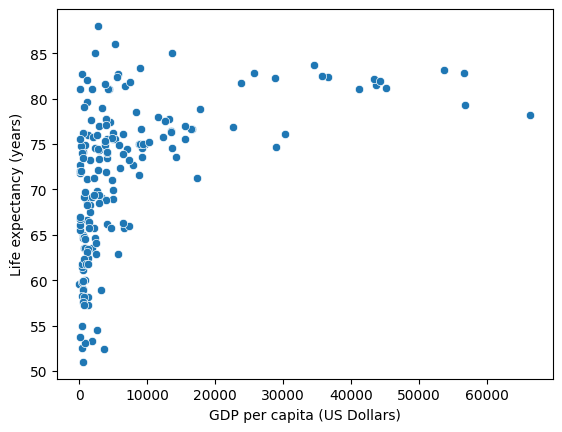

In [17]:
sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy")

# Label both axes
plt.xlabel("GDP per capita (US Dollars)")
plt.ylabel("Life expectancy (years)")

# Show the figure
plt.show()

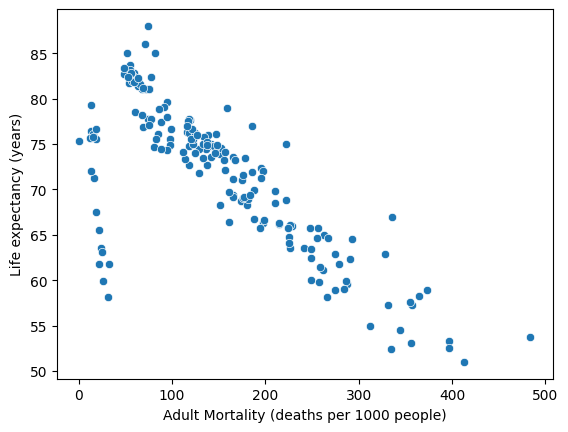

In [22]:
sns.scatterplot(data = life_df, x = "Adult Mortality", y = "Life expectancy")

# Label both axes
plt.xlabel("Adult Mortality (deaths per 1000 people)")
plt.ylabel("Life expectancy (years)")

# Show the figure
plt.show()

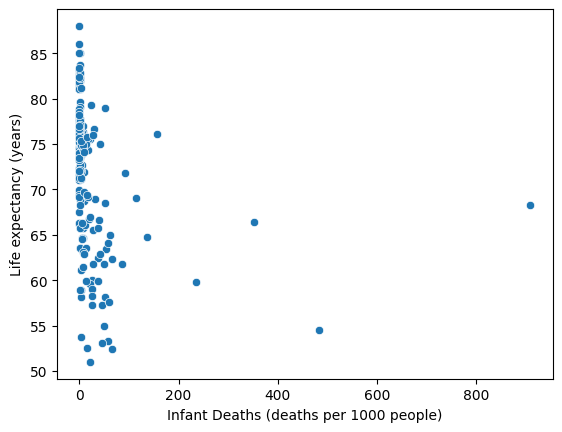

In [23]:
sns.scatterplot(data = life_df, x = "infant deaths", y = "Life expectancy")

# Label both axes
plt.xlabel("Infant Deaths (deaths per 1000 people)")
plt.ylabel("Life expectancy (years)")

# Show the figure
plt.show()

<Axes: >

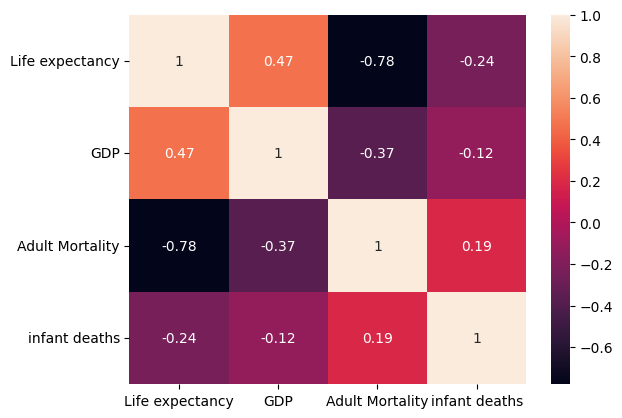

In [29]:
column_list = ["Life expectancy", "GDP", "Adult Mortality","infant deaths"]
sns.heatmap(life_df[column_list].corr(), annot = True)

Text(0, 0.5, 'Life expectancy (years)')

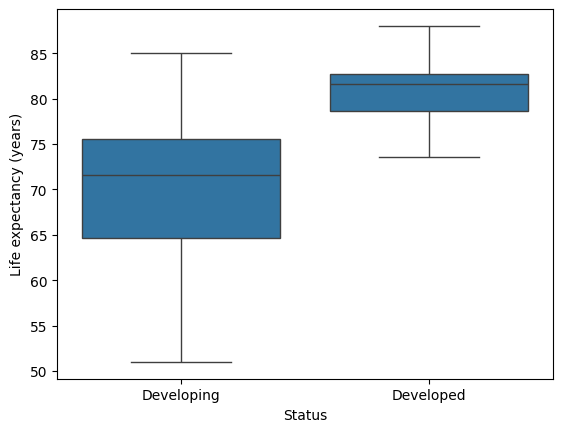

In [42]:
sns.boxplot(data = life_df, x = "Status", y = "Life expectancy")

# Label both axes
plt.xlabel("Status")
plt.ylabel("Life expectancy (years)")

In [43]:
x = life_df["GDP"]
y = life_df["Life expectancy"]

x = x.to_numpy().reshape(-1, 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("There are %d data points in the training set." %(len(x_train), ))
print("There are %d data points in the testing set." %(len(x_test), ))

There are 146 data points in the training set.
There are 37 data points in the testing set.


In [44]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(x)

x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [45]:
from sklearn.linear_model import LinearRegression

life_linear = LinearRegression()
life_linear.fit(x_train_scaled, y_train)

gradient = life_linear.coef_[0]
intercept = life_linear.intercept_
print("gradient: ", gradient)
print("intercept: ", intercept)

gradient:  3.7366730771665697
intercept:  71.8160790718866


Mean absolute error:  6.189693012844059
Mean squared error:  58.34352663502324
Root mean squared error:  7.638293437347326
R2:  0.15096662913593706


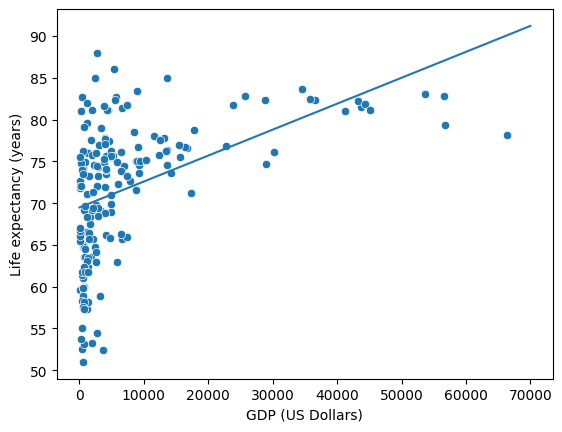

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

life_pred = life_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, life_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, life_pred)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, life_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

x_fit = np.arange(0, 70000, 1).reshape(-1, 1)
x_fit_scaled = scale.transform(x_fit)
y_fit = life_linear.predict(x_fit_scaled)

sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy")
plt.plot(x_fit, y_fit)

# Label both axes
plt.xlabel("GDP (US Dollars)")
plt.ylabel("Life expectancy (years)")

# Show the plot
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly.fit_transform(x_train_scaled)

life_poly = LinearRegression()
life_poly.fit(x_poly, y_train)

# Get the fit coefficients from the best-fit model.
coefficients = life_poly.coef_
intercept = life_poly.intercept_

# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

x_test_poly = poly.fit_transform(x_test_scaled)
life_pred = life_poly.predict(x_test_poly)
mean_abs = mean_absolute_error(y_test, life_pred)
mean_squared = mean_squared_error(y_test, life_pred)
rms_error = np.sqrt(mean_squared)
R2 = r2_score(y_test, life_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

ValueError: could not convert string to float: 'Low'

In [15]:
# Extract the input feature
x = life_df["Adult Mortality"]
# Extract the output feature
y = life_df["Life expectancy"]

# Since we only have a single input feature,
# we need to re-shape x so that it has
# 2 dimensions.
x = x.to_numpy().reshape(-1, 1)
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =  42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# Create an instance of the model
life_linear = LinearRegression()
# Fit the model to the training data.
life_linear.fit(x_train_scaled, y_train)
# Get the fit coefficients from the
# best-fit model.
gradient = life_linear.coef_[0]
intercept = life_linear.intercept_
# Print the coefficients.
print("gradient: ", gradient)
print("intercept: ", intercept)
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
life_pred = life_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, life_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, life_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, life_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

gradient:  -6.226260962315732
intercept:  72.01575342465753
Mean absolute error:  3.613527279115094
Mean squared error:  27.828514734570373
Root mean squared error:  5.275273901378996
R2:  0.5950306909104601


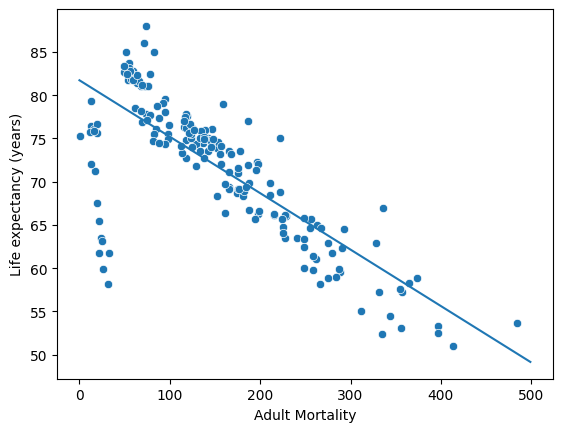

In [16]:
# Create an array of values covering the range
# of Adult Mortalities that we found in the
# dataset, i.e. from 0 to 500 (see the plots
# from the exploratory data analysis for
# guidance).
x_fit = np.arange(0, 500, 1).reshape(-1, 1)
# Apply the standardisation transformation using
# the same StandardScaler that we used on the
# training and testing data.
x_fit_scaled = scale.transform(x_fit)
# Apply the trained model to this scaled input array.
# This will give us the y-values for the best-fit line.
y_fit = life_linear.predict(x_fit_scaled)
# Use seaborn to create a scatter plot of Life expectancy
# versus Adult Mortality.
sns.scatterplot(data = life_df, x = "Adult Mortality", y = "Life expectancy")
# Plot the best-fit line from
# the trained model
plt.plot(x_fit, y_fit)
# Label both axes
plt.xlabel("Adult Mortality")
plt.ylabel("Life expectancy (years)")
# Show the plot
plt.show()

In [19]:
# Extract the input feature
x = life_df["GDP"]
# Extract the output feature
y = life_df["Life expectancy"]
# Since we only have a single input feature,
# we need to re-shape x so that it has
# 2 dimensions.
x = x.to_numpy().reshape(-1, 1)
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

# Import the PolynomialFeatures class from the
# sklearn library.
from sklearn.preprocessing import PolynomialFeatures
# Create an instance of the PolynomialFeatures class.
# We can set the degree of the polynomial here, for
# this exercise we are using a degree of 2. We set the
# include_bias parameter to false, this means that we
# don't include the constant (intercept) term with these
# polynomial features. We will see that this gets added
# in later instead, using the intercept.
poly = PolynomialFeatures(degree = 2, include_bias = False)
# Now apply this PolynomialFeatures transformation to
# the scaled input data from the training set. The result
# will give us a 2-dimensional array, where the first column
# contains the terms for x and the second column contains
# the terms for x**2.
x_poly = poly.fit_transform(x_train_scaled)

# Create an instance of the LinearRegression model.
life_poly = LinearRegression()
# Fit the model to the training data.
life_poly.fit(x_poly, y_train)

# Get the fit coefficients from the
# best-fit model.
coefficients = life_poly.coef_
intercept = life_poly.intercept_
# Print the coefficients
print("coefficients: ", coefficients)
print("intercept: ", intercept)

# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset. We first need to create
# the polynomial features from the scaled
# inputs features in the testing set, and then
# we can use this with the final trained model
# to get the predicted life expectancies.
x_test_poly = poly.fit_transform(x_test_scaled)
life_pred = life_poly.predict(x_test_poly)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, life_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, life_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, life_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [ 7.769865   -1.56197573]
intercept:  73.57772915197545
Mean absolute error:  5.512620340546638
Mean squared error:  50.900325755079
Root mean squared error:  7.13444642246888
R2:  0.2592824320638294


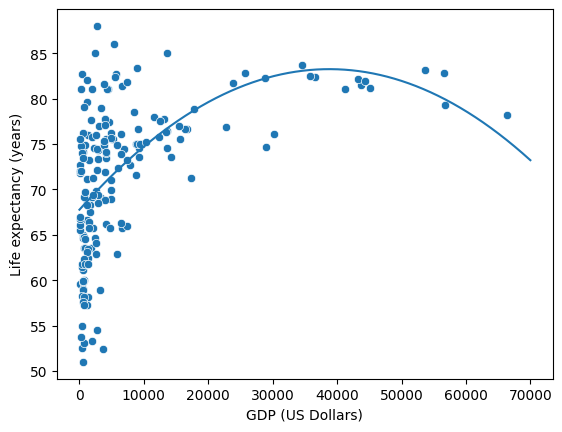

In [20]:
# Create an array of values covering the range
# of GDP that we found in the dataset, i.e.
# from 0 to 70,000.
x_fit = np.arange(0, 70000, 1).reshape(-1, 1)
# Apply the standardisation transformation using
# the same StandardScaler that we used on the
# training and testing data.
x_fit_scaled = scale.transform(x_fit)
# Create the polyomial features and apply them
# to the trained model. This will give us the
# y-values for the best-fit line.
x_fit_poly = poly.fit_transform(x_fit_scaled)
y_fit = life_poly.predict(x_fit_poly)
# Use seaborn to create a scatter plot of Life expectancy
# versus GDP.
sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy")
# Plot the best-fit line from
# the trained model
plt.plot(x_fit, y_fit)
# Label both axes
plt.xlabel("GDP (US Dollars)")
plt.ylabel("Life expectancy (years)")
# Show the plot
plt.show()

In [21]:
feature_names = ["GDP", "Adult Mortality", "infant deaths"]
x = life_df[feature_names]
y = life_df["Life expectancy"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

scale = StandardScaler()
scale.fit(x_train)

x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

life_linear = LinearRegression()
life_linear.fit(x_train_scaled, y_train)

intercept = life_linear.intercept_
coefficients = life_linear.coef_
print("coefficients: ", coefficients)
print("intercept: ", intercept)

life_pred = life_linear.predict(x_test_scaled)

# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, life_pred)

# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, life_pred)
rms_error = np.sqrt(mean_squared)

# Calculate the R2 score
R2 = r2_score(y_test, life_pred)

# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

coefficients:  [ 1.78149487 -5.46613185 -0.60725758]
intercept:  72.01575342465753
Mean absolute error:  3.5653880708491363
Mean squared error:  26.207918098618478
Root mean squared error:  5.119366962683812
R2:  0.6186141234520102


In [23]:
from sklearn.ensemble import RandomForestRegressor
feature_names = ["GDP", "Adult Mortality", "infant deaths"]
x = life_df[feature_names]
# Extract the output feature
y = life_df["Life expectancy"]
# Split the x and y data between the
# training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
# Create an instance of the model
life_linear = RandomForestRegressor()
# Fit the model to the training data.
life_linear.fit(x_train_scaled, y_train)
# Use the final, trained model to predict the
# outputs (life expectancies) for countries in
# the testing dataset.
life_pred = life_linear.predict(x_test_scaled)
# Calculate the mean absolute error
mean_abs = mean_absolute_error(y_test, life_pred)
# Calculate the mean squared error
mean_squared = mean_squared_error(y_test, life_pred)
# Calculate the root mean squared error
rms_error = np.sqrt(mean_squared)
# Calculate the R2 score
R2 = r2_score(y_test, life_pred)
# Print the results of these metrics.
print("Mean absolute error: ", mean_abs)
print("Mean squared error: ", mean_squared)
print("Root mean squared error: ", rms_error)
print("R2: ", R2)

Mean absolute error:  2.137810810810808
Mean squared error:  8.782777864864821
Root mean squared error:  2.963575182927678
R2:  0.8721902509801294


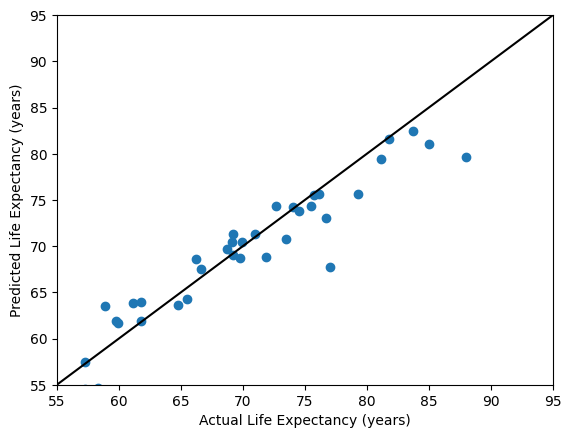

In [24]:
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, life_pred)
# Add a straight diagonal line to the plot.
# If the model is performing well, the data
# points should lie along this line, meaning
# that the predicted values are equal to the
# actual values.
plt.plot([55, 95], [55, 95], 'k-')
# Label both axes.
plt.xlabel("Actual Life Expectancy (years)")
plt.ylabel("Predicted Life Expectancy (years)")
# Limit the range of values on both axes
plt.xlim(55, 95)
plt.ylim(55, 95)
plt.show()

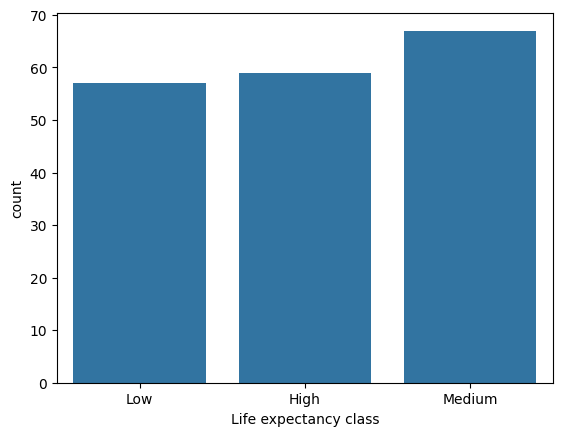

In [26]:
# Use seaborn to plot the distribution of class labels
sns.countplot(data = life_df, x = "Life expectancy class")
plt.show()

<Axes: xlabel='Life expectancy class', ylabel='count'>

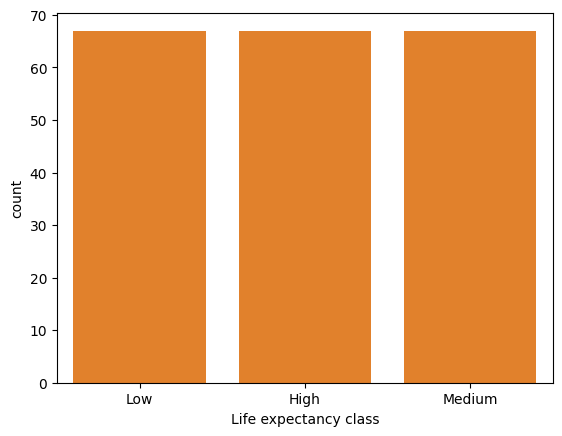

In [31]:
feature_names = ["GDP", "Adult Mortality", "infant deaths"]
x = life_df[feature_names]
y = life_df["Life expectancy class"]

# Use seaborn to plot the distribution of class labels
sns.countplot(data = life_df, x = "Life expectancy class")
# Import the SMOTE class from the sklearn library.

from imblearn.over_sampling import SMOTE
# Create an instance of the SMOTE class, and
# set the relevant parameters.
sm = SMOTE(random_state=42, k_neighbors = 2)
# Apply the SMOTE technique to the original
# data, x and y. This will give us two new
# arrays of data, which we have called
# x_res and y_res. These contain the inputs
# and outputs for the new, re-sampled dataset.
x_res, y_res = sm.fit_resample(x, y)
# To make the plotting easier, I have converted the array
# of class label outputs in the re-sampled dataset into
# a new Pandas data frame.
new_df = pd.DataFrame({"Life expectancy class" : y_res.to_numpy()})

# Now use Seaborn to plot the distribution of class labels.
sns.countplot(data = new_df, x = "Life expectancy class")

In [32]:
# Split the x_res and y_res data between
# the training and testing datasets.
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state = 42)
# Create an instance of the StandardScaler class
scale = StandardScaler()
# Fit the standard scaler to the input data that
# we have in x_train.
scale.fit(x_train)
# Now apply the standard scaler transformation
# to both the training and the testing sets.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

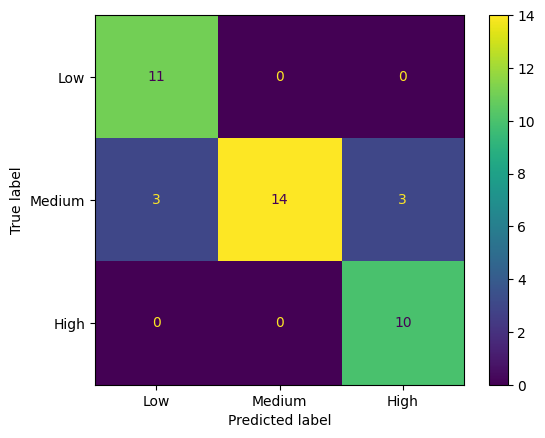

In [34]:
# Import the KNeighboursClassifier model from the
# sklearn library
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of this model.
life_class = KNeighborsClassifier()
# Fit the model to the training data.
life_class.fit(x_train_scaled,y_train)
# Use the trained model to predict the output
# class labels for the training set.
life_pred = life_class.predict(x_test_scaled)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, life_pred, labels = ["Low", "Medium", "High"])
# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels = ["Low", "Medium", "High"])
disp.plot()

In [36]:
# Import the classification_report function from sklearn
from sklearn.metrics import classification_report
# Print the classification report for this model.
print(classification_report(y_test, life_pred))

              precision    recall  f1-score   support

        High       0.77      1.00      0.87        10
         Low       0.79      1.00      0.88        11
      Medium       1.00      0.70      0.82        20

    accuracy                           0.85        41
   macro avg       0.85      0.90      0.86        41
weighted avg       0.89      0.85      0.85        41

